<a href="https://colab.research.google.com/github/Sans7349/CodersCave-Data_Science-CVIP_Project/blob/main/PHASE_2_NORMAL_TASK_CLIMATE_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values summary:
Series([], dtype: int64)
Summary statistics for key variables:
       DailyMaximumDryBulbTemperature  DailyMinimumDryBulbTemperature  \
count                     2668.000000                     2668.000000   
mean                        59.418666                       40.299100   
std                         20.003706                       18.122395   
min                          5.000000                      -13.000000   
25%                         42.000000                       27.000000   
50%                         60.000000                       40.000000   
75%                         77.000000                       55.250000   
max                         97.000000                       77.000000   

       DailyPrecipitation  DailySnowfall  DailySnowDepth  DailyPeakWindSpeed  
count         2668.000000    2668.000000     2668.000000         2668.000000  
mean             0.111166       0.139205        0.554348           25.513493  
std              0

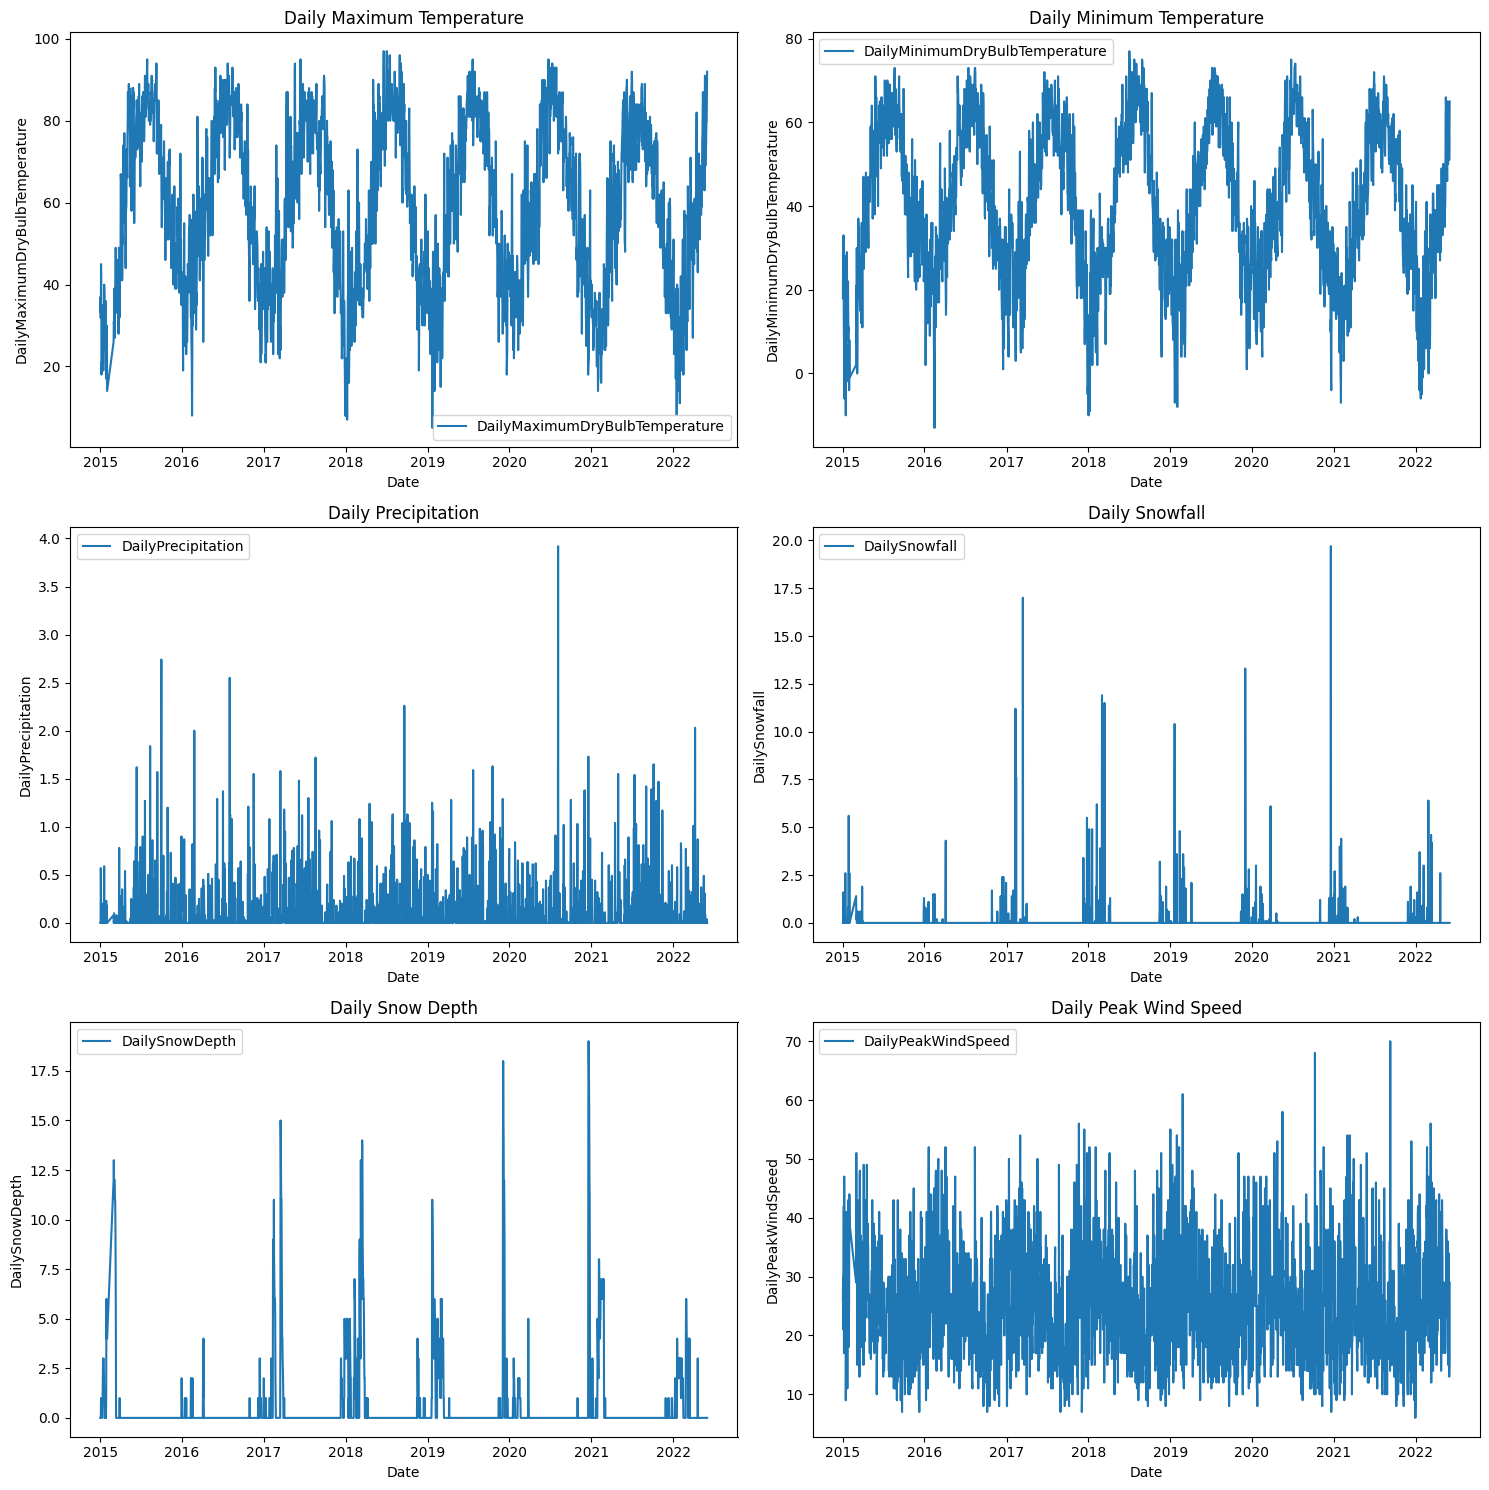

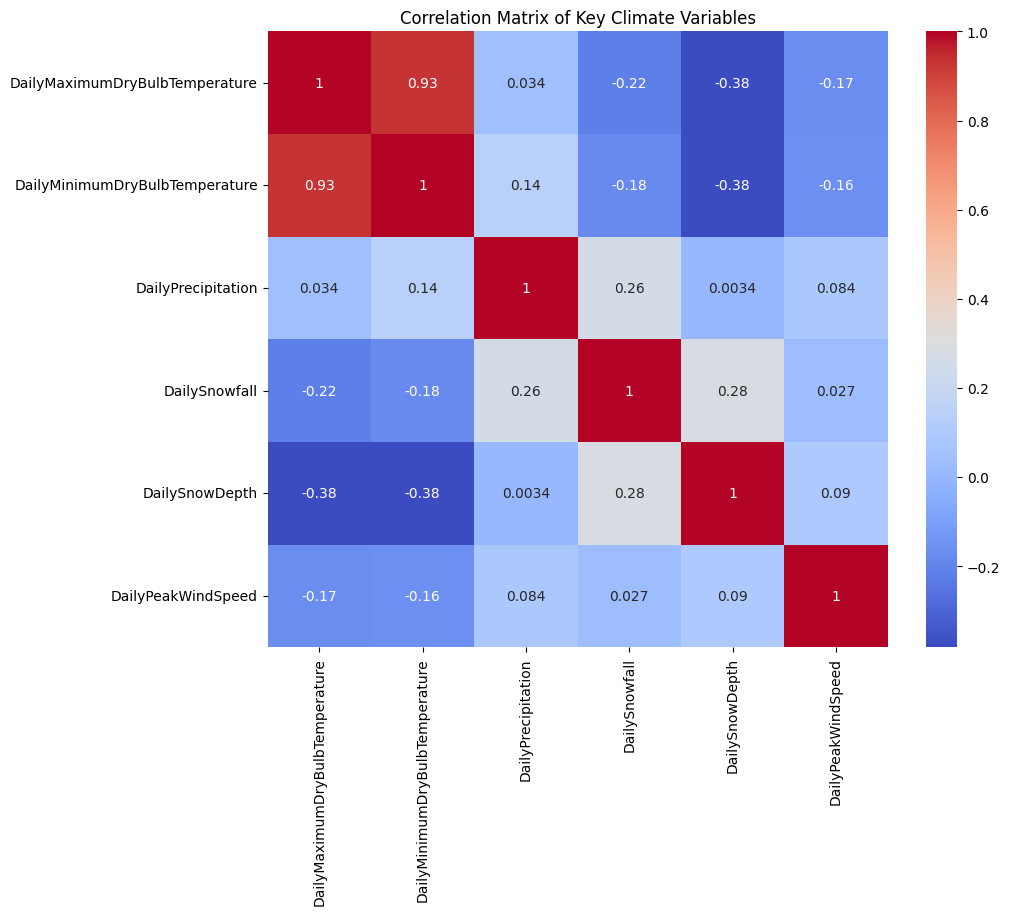

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/daily_data.csv'
climate_data = pd.read_csv(file_path)
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'])
climate_data.replace('T', 0, inplace=True)

key_variables = [
    'DailyMaximumDryBulbTemperature',
    'DailyMinimumDryBulbTemperature',
    'DailyPrecipitation',
    'DailySnowfall',
    'DailySnowDepth',
    'DailyPeakWindSpeed'
]

for var in key_variables:
    climate_data[var] = pd.to_numeric(climate_data[var], errors='coerce')


missing_values = climate_data.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
print("Missing values summary:")
print(missing_values_summary)

# Generate summary statistics for the key variables
summary_statistics = climate_data[key_variables].describe()

print("Summary statistics for key variables:")
print(summary_statistics)

# Plotting trends over time for key variables
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Define titles for each subplot
titles = [
    'Daily Maximum Temperature',
    'Daily Minimum Temperature',
    'Daily Precipitation',
    'Daily Snowfall',
    'Daily Snow Depth',
    'Daily Peak Wind Speed'
]

# Plot each variable
for i, var in enumerate(key_variables):
    row, col = divmod(i, 2)
    axs[row, col].plot(climate_data['DATE'], climate_data[var], label=var)
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel(var)
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = climate_data[key_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Climate Variables')
plt.show()
